# Q1

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, f_oneway, shapiro, normaltest, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

## Load dataset

In [2]:
# Load the dataset
data = pd.read_csv("ingredient.csv") 

# Display the first few rows of the dataset
data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


## Check if there is any missing value. If yes, remove the instance.

In [3]:
# Check if there is any missing value. If yes, remove the instance.
data.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

There is no missing value in the dataset.

## Descriptive statistics of the dataset

In [4]:
# Descriptive Statistics
print("Descriptive Statistics:")
data.describe()


Descriptive Statistics:


,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Above shows a quick overview of the basic statistics of the dataset, we can conclude that the minimum and maximum range for all features are fairly small, except for **'formula g'**. Moreover, the standard deviation for **formula a** and **formula i** are small, suggesting a high cluster of data around the mean.

## Visualization to access data distribution

### Histogram

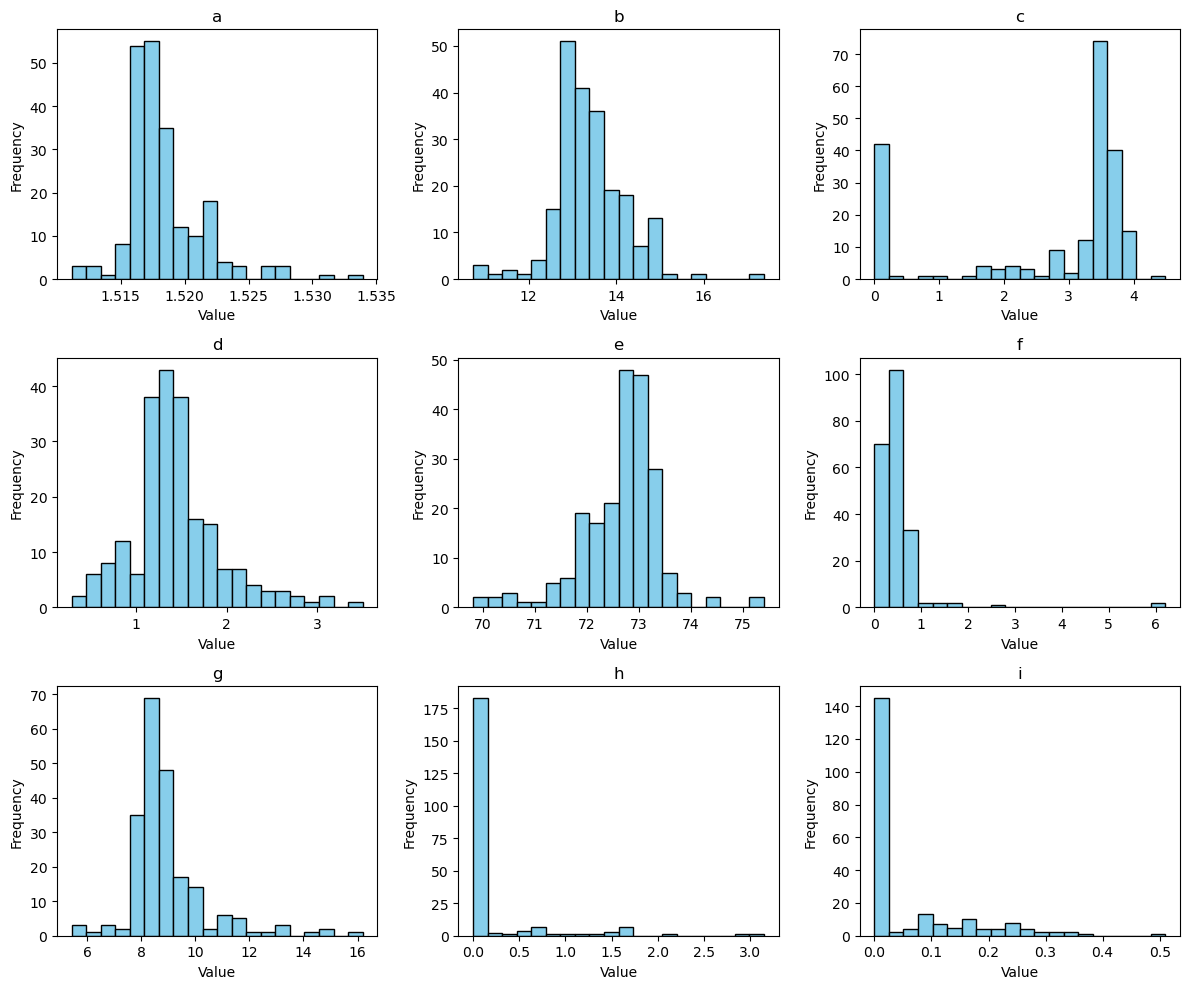

In [5]:
# Visual Inspection to assess data distribution
def visualize_distribution(data):
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(data.columns, start=1):
        plt.subplot(3, 3, i)
        plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

visualize_distribution(data)


Based on the histogram, the distributions of the additives are as follows:

- a: Data skewed to right (mode < median < mean) 
- b: Data skewed to right (mode < median < mean)
- c: Data skewed to left (mean < median < mode)
- d: Data skewed to right (mode < median < mean)
- e: Data skewed to left (mean < median < mode)
- f: Data skewed to right (mode < median < mean)
- g: Data skewed to right (mode < median < mean)
- h: Data skewed to right (mode < median < mean) 
- i: Data skewed to right (mode < median < mean)

### Boxplot

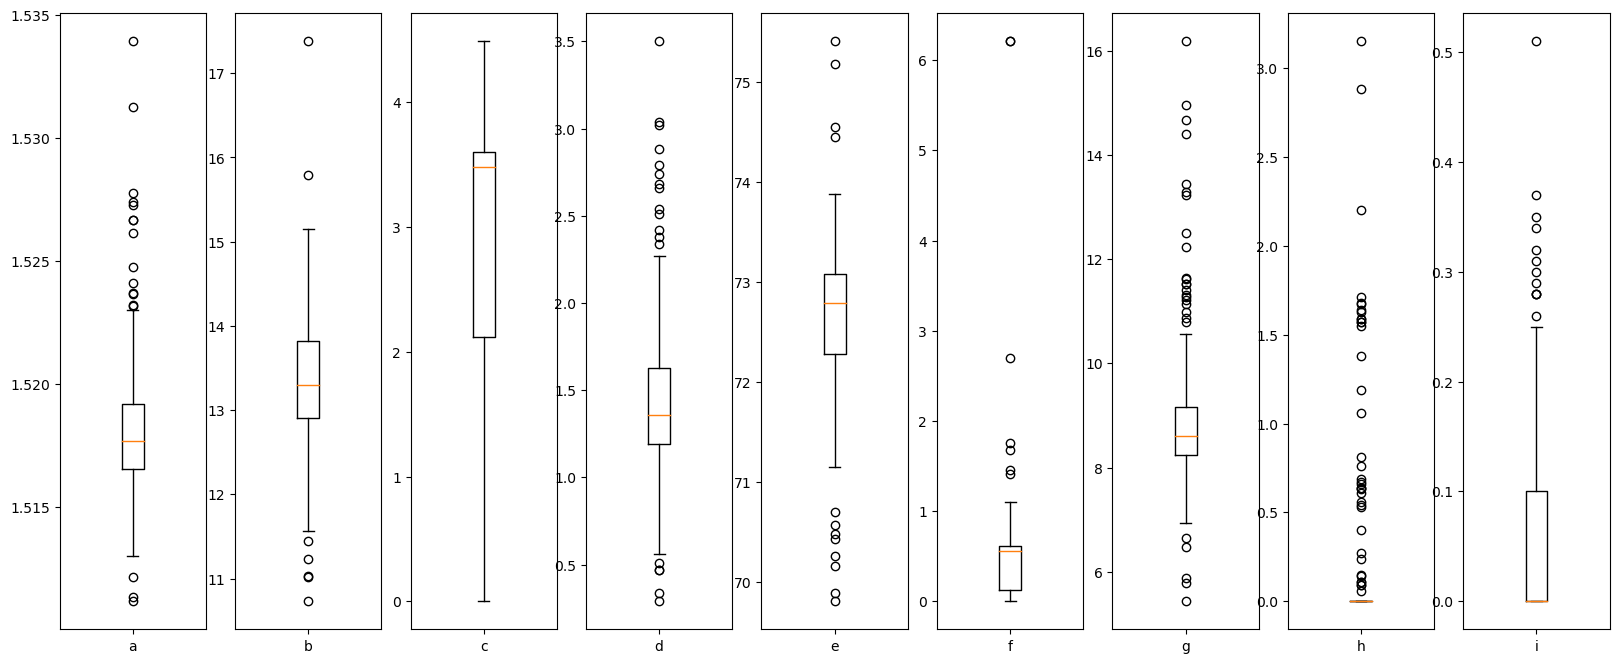

In [6]:
plt.figure(figsize=(20,8))

# plot box plots of each feature
for i in range(len(data.columns[0:9])):
    ax = plt.subplot(1, 9, i+1)
    ax.boxplot(data.iloc[:, i])
    ax.set_xticklabels([data.columns[i]])

plt.show()

However, looking at boxplot, the distribution seems different and are as follows:

- a: Normal distributed, with outliers
- b: Normal distributed, with outliers
- c: Data skewed to left, with no outliers
- d: Normal distributed, with outliers
- e: Data skewed to left, with outliers
- f: Data skewed to right, with outliers
- g: Normal distributed, with outliers
- h: Outliers 
- i: Data skewed to right, with outliers

#### Correlation Analysis

Correlation analysis is used to measure the strength and direction of the relationship between variables.

Correlation coefficients have a value of between -1 and 1:
* 0: no relationship between the variables at all
* 1: perfect positive correlation between the variables
* -1: perfect negative correlation between the variables

However, the limitation of correlation analysis is that it does not establish causation, despite provides insights into the relationships between variables.

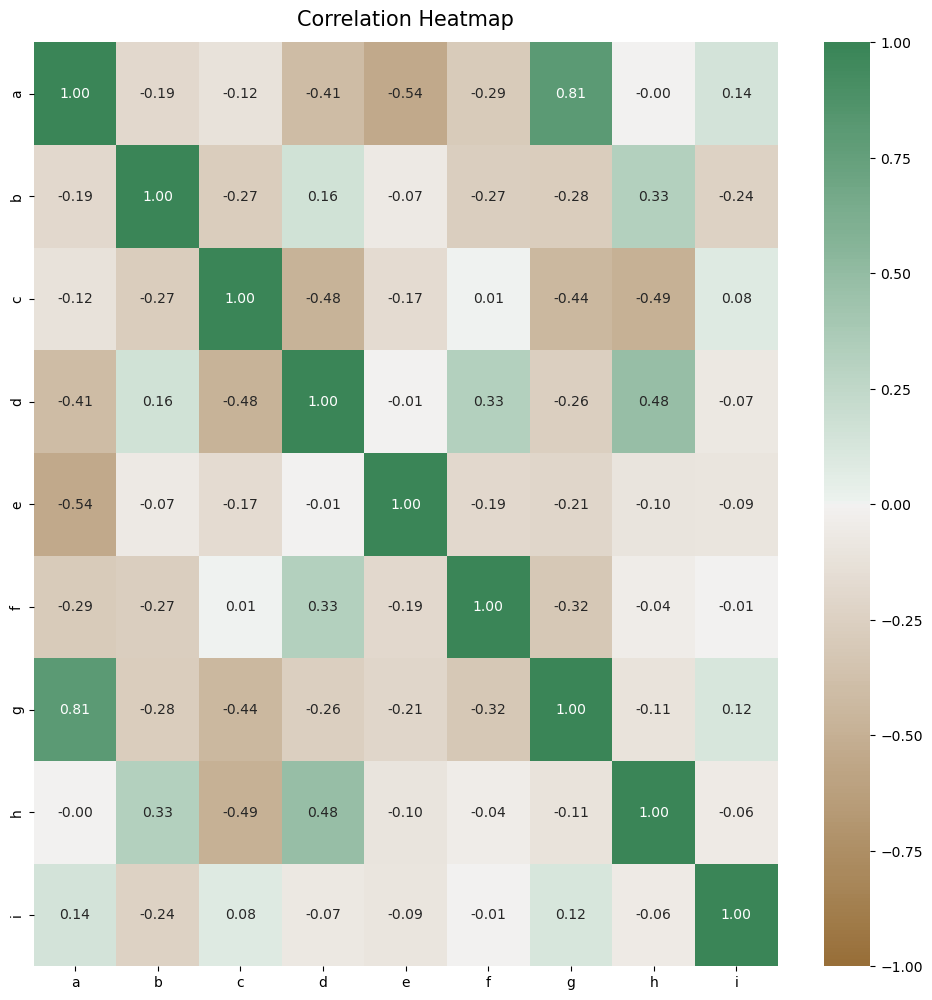

In [7]:
# Correlation Analysis
correlation_matrix = data.corr()

plt.figure(figsize=(12, 12))
axis_corr = sns.heatmap(
correlation_matrix,
vmin=-1, vmax=1, center=0, annot=True,
cmap=sns.diverging_palette(50, 500, n=500), fmt=".2f")
axis_corr.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)

plt.show()

From the heatmap above, the highest value of correlation coefficient is 0.81, between **Formula a** and **Formula g**, indicating a fairly strong positive linear correlation between the two variables. We can see that **Formula b** and **Formula d** are positively correlated towards **Formula h** too.

Meaning that both formula a and formula g might provide the same burning pattern, either formula a or formula g can be chosen but not both. The same for both formula b and formula d.


#### Multivariate analysis
The relationships between multiple variables are studied simultaneously. 

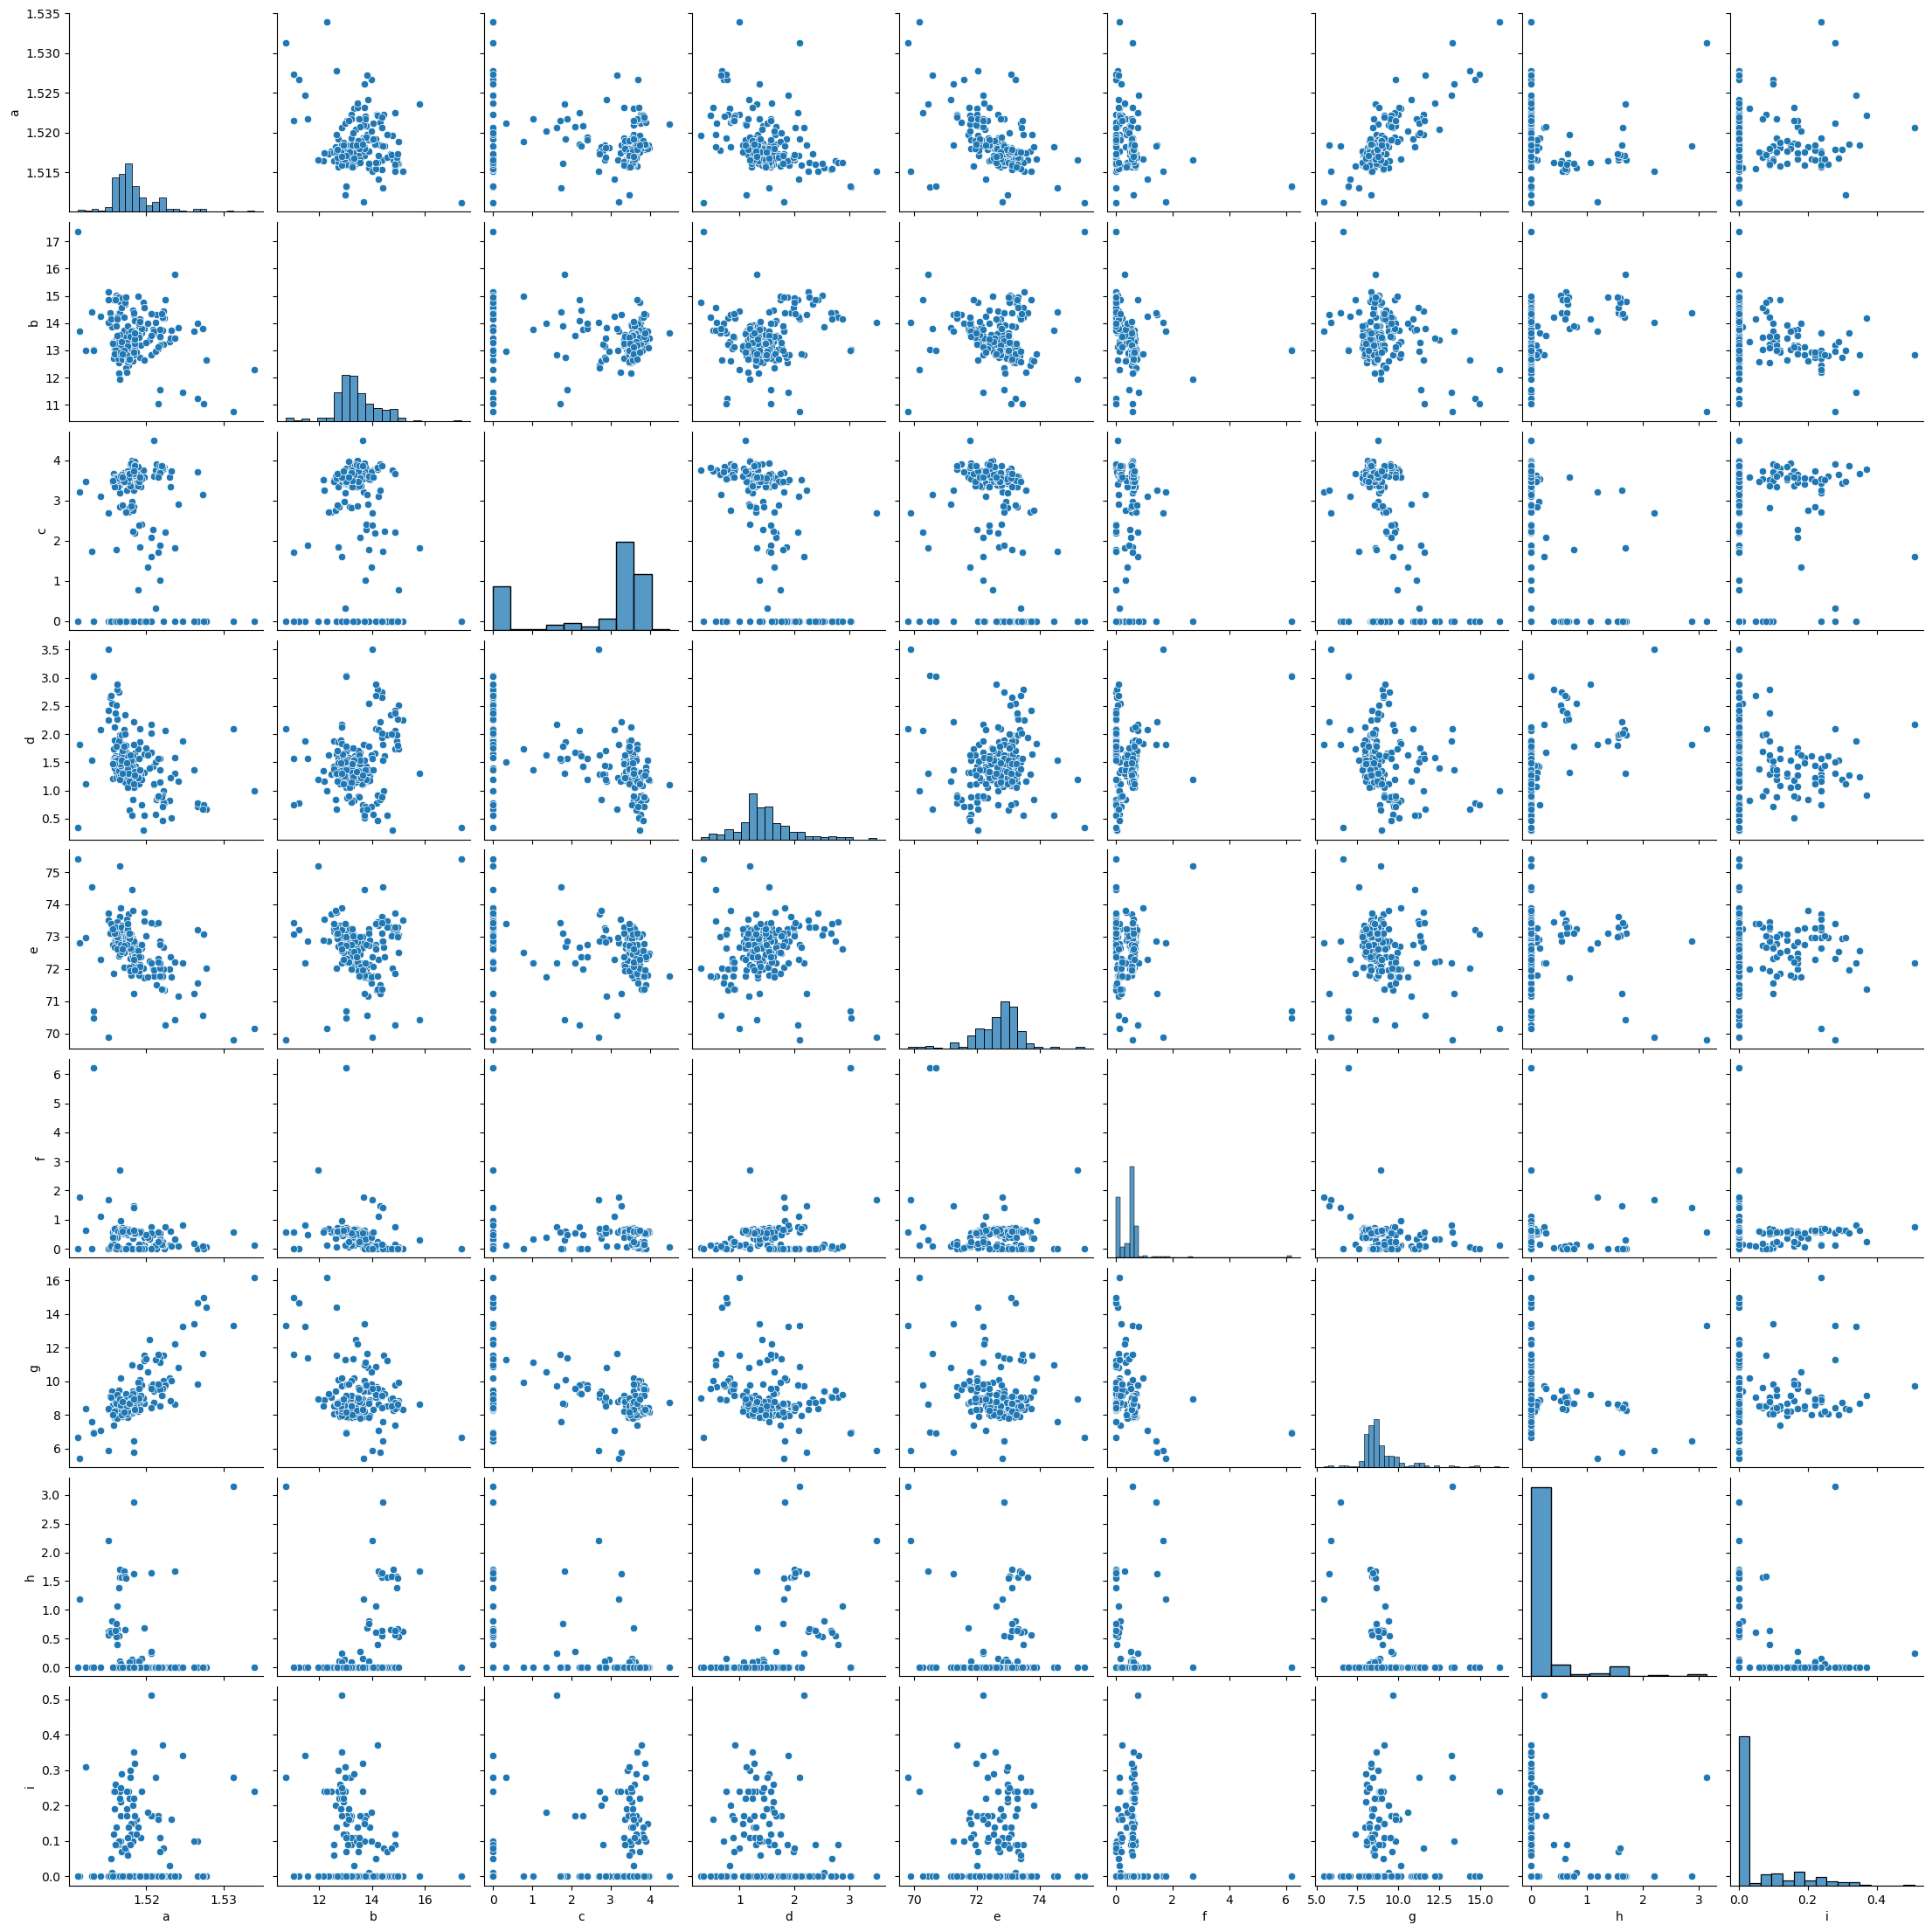

In [8]:
# Distribution of the data
# Pairwise Relationships between Additives
sns.pairplot(data)
plt.show()

Based on the plot above, we can see that the scatter plot patterns support the correlation values that were shown in the correlation matrix. Furthermore, we can see the pattern of each feature where all features loosely did not follow a normal distribution pattern and the features data are mostly skewed.

## Statistical Test

In [9]:
# Statistical Tests for Normality
def normality_tests(data):
    normality_results = {}
    for col in data.columns:
        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = shapiro(data[col])
        
        # D'Agostino and Pearson's test (combination of skewness and kurtosis)
        k2_stat, k2_p = normaltest(data[col])
        
        normality_results[col] = {
            "Shapiro-Wilk (p-value)": shapiro_p,
            "D-Agostino and Pearson (p-value)": k2_p
        }
    return normality_results

normality_results = normality_tests(data)
print("Normality Test Results:")
for col, result in normality_results.items():
    print(f"{col}: Shapiro-Wilk p-value = {result['Shapiro-Wilk (p-value)']}, D-Agostino and Pearson p-value = {result['D-Agostino and Pearson (p-value)']}")


Normality Test Results:
a: Shapiro-Wilk p-value = 1.076628478209607e-12, D-Agostino and Pearson p-value = 4.806065113857494e-19
b: Shapiro-Wilk p-value = 3.466534508334007e-07, D-Agostino and Pearson p-value = 1.3606315193912945e-06
c: Shapiro-Wilk p-value = 2.39100252521815e-19, D-Agostino and Pearson p-value = 1.6133774867893193e-08
d: Shapiro-Wilk p-value = 2.0831905089835345e-07, D-Agostino and Pearson p-value = 1.0345205542035924e-08
e: Shapiro-Wilk p-value = 2.17513873579378e-09, D-Agostino and Pearson p-value = 1.6228831908287943e-08
f: Shapiro-Wilk p-value = 2.1721748481042377e-25, D-Agostino and Pearson p-value = 4.222522236925305e-67
g: Shapiro-Wilk p-value = 4.2866537515527225e-16, D-Agostino and Pearson p-value = 1.6916975823728216e-24
h: Shapiro-Wilk p-value = 5.383317472315612e-26, D-Agostino and Pearson p-value = 3.192616620971566e-39
i: Shapiro-Wilk p-value = 1.1566894635919468e-20, D-Agostino and Pearson p-value = 2.0353875688667416e-17


In [10]:
normality_results_df = pd.DataFrame(normality_results)
normality_results_df = normality_results_df.T

print("Max values")
print(normality_results_df.max())

print("\nMin values")
print(normality_results_df.min())

normality_results_df

Max values
Shapiro-Wilk (p-value)              3.466535e-07
D-Agostino and Pearson (p-value)    1.360632e-06
dtype: float64

Min values
Shapiro-Wilk (p-value)              5.383317e-26
D-Agostino and Pearson (p-value)    4.222522e-67
dtype: float64


,Shapiro-Wilk (p-value),D-Agostino and Pearson (p-value)
a,1.076628e-12,4.806065e-19
b,3.466535e-07,1.360632e-06
c,2.391003e-19,1.613377e-08
d,2.083191e-07,1.034521e-08
e,2.175139e-09,1.622883e-08
f,2.172175e-25,4.222522e-67
g,4.286654e-16,1.691698e-24
h,5.383317e-26,3.192617e-39
i,1.156689e-20,2.035388e-17


Low p-values are observed in all formulas. Where:
- **formula b** has the **highest p-value**, indicating that there is more chance for formula b to occured at a random state, indicate that it has a random burning characteristic, which is not a good choice of petrol addictives. 
- **formula f** and **formula h** have the **lowest p-value,** indicating that there are lower chancec for formula f and formula h to occured at a random state, indicate that they have a constant burning characteristic, which is a good choice of petrol addictives.

In [11]:
# Decision on Parametric or Non-parametric Tests
def decide_test(normality_results):
    parametric_cols = []
    non_parametric_cols = []
    for col, result in normality_results.items():
        # If both p-values are greater than 0.05, assume normality
        if result['Shapiro-Wilk (p-value)'] > 0.05 and result['D\'Agostino and Pearson (p-value)'] > 0.05:
            parametric_cols.append(col)
        else:
            non_parametric_cols.append(col)
    return parametric_cols, non_parametric_cols

parametric_cols, non_parametric_cols = decide_test(normality_results)
print("Parametric Tests can be applied to:", parametric_cols)
print("Non-parametric Tests should be considered for:", non_parametric_cols)


Parametric Tests can be applied to: []
Non-parametric Tests should be considered for: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']


In [12]:
# non-parameteric test
def perform_mann_whitney_u(data, col1, col2):
    stat, p = mannwhitneyu(data[col1], data[col2])
    return p

cols = []
for i in range(len(non_parametric_cols)):
    cols.append(non_parametric_cols[i])

for i in range(len(non_parametric_cols)):
    for j in range(i + 1, len(non_parametric_cols)):
        p_value = perform_mann_whitney_u(data, cols[i], cols[j])
        print(f"P-value for Mann-Whitney U test between {cols[i]} and {cols[j]}: {p_value}")


P-value for Mann-Whitney U test between a and b: 1.2822551390128121e-71
P-value for Mann-Whitney U test between a and c: 1.849200182803487e-24
P-value for Mann-Whitney U test between a and d: 8.473624948800912e-06
P-value for Mann-Whitney U test between a and e: 1.2826177054896826e-71
P-value for Mann-Whitney U test between a and f: 2.808847423055125e-65
P-value for Mann-Whitney U test between a and g: 1.2826492377937688e-71
P-value for Mann-Whitney U test between a and h: 1.0227399829495744e-59
P-value for Mann-Whitney U test between a and i: 2.2191133109875054e-74
P-value for Mann-Whitney U test between b and c: 1.0962999048696292e-71
P-value for Mann-Whitney U test between b and d: 1.2779436461698521e-71
P-value for Mann-Whitney U test between b and e: 1.2805854881790471e-71
P-value for Mann-Whitney U test between b and f: 1.194262144353059e-71
P-value for Mann-Whitney U test between b and g: 1.90721783552952e-64
P-value for Mann-Whitney U test between b and h: 7.867676449412567e-77

If given significance level is 0.05, all the combination of formula are less than the stated significance level, indicate that the combination of all the formulas are different from one another.

## ANOVA

In [13]:
# ANOVA
# Assuming we have a target variable and want to see if additives affect it.
# Here, I'm assuming "a" is the target variable.
target_variable = "a"

# Perform ANOVA for each additive
anova_results = {}
for col in data.columns:
    if col != target_variable:
        groups = [data[data[target_variable] == group][col] for group in data[target_variable].unique()]
        f_statistic, p_value = f_oneway(*groups)
        anova_results[col] = {"F-statistic": f_statistic, "p-value": p_value}

print("ANOVA Results:")
for col, result in anova_results.items():
    print(f"{col}: F-statistic = {result['F-statistic']}, p-value = {result['p-value']}")

ANOVA Results:
b: F-statistic = 2.64600992043403, p-value = 0.00047574419704573255
c: F-statistic = 2.5253874361477906, p-value = 0.0007882930183548355
d: F-statistic = 4.029837021328731, p-value = 2.855611798668525e-06
e: F-statistic = 2.50302178361474, p-value = 0.0008665798789186703
f: F-statistic = 6.443193514713721, p-value = 3.749463097983164e-09
g: F-statistic = 8.35072407156953, p-value = 7.110825606871994e-11
h: F-statistic = 2.0865710803431883, p-value = 0.005337939108522851
i: F-statistic = 2.2106514664375467, p-value = 0.0030742894602194806


In [14]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

index = pd.MultiIndex.from_product([['a','b','c','d','e','f','g','h','i'],['a','b','c','d','e','f','g','h','i']],
                                   names=['cat1', 'cat2'])

tables = []
for cat1_var,cat2_var in index:
    model = ols('{} ~ {}'.format(cat1_var,cat2_var), data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    tables.append(anova_table)

df_anova = pd.concat(tables, keys=index, axis=0)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_anova)

                       sum_sq     df          F     PR(>F)
cat1 cat2                                                 
a    a    a         1.964e-03    1.0  4.788e+24  0.000e+00
          Residual  8.698e-26  212.0        NaN        NaN
     b    b         7.233e-05    1.0  8.104e+00  4.850e-03
          Residual  1.892e-03  212.0        NaN        NaN
     c    c         2.937e-05    1.0  3.218e+00  7.427e-02
          Residual  1.935e-03  212.0        NaN        NaN
     d    d         3.259e-04    1.0  4.217e+01  5.848e-10
          Residual  1.638e-03  212.0        NaN        NaN
     e    e         5.772e-04    1.0  8.821e+01  9.649e-18
          Residual  1.387e-03  212.0        NaN        NaN
     f    f         1.650e-04    1.0  1.944e+01  1.648e-05
          Residual  1.799e-03  212.0        NaN        NaN
     g    g         1.290e-03    1.0  4.056e+02  4.008e-51
          Residual  6.743e-04  212.0        NaN        NaN
     h    h         2.927e-10    1.0  3.159e-05  9.955e-

## Unsupervised Clustering

/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


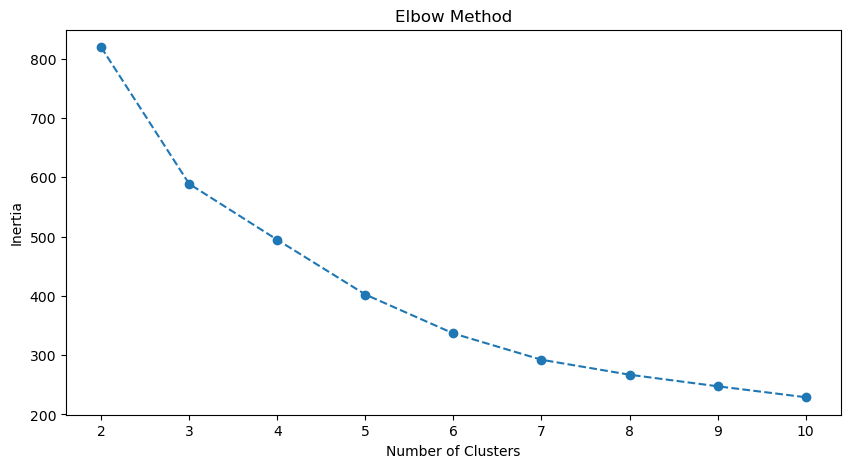

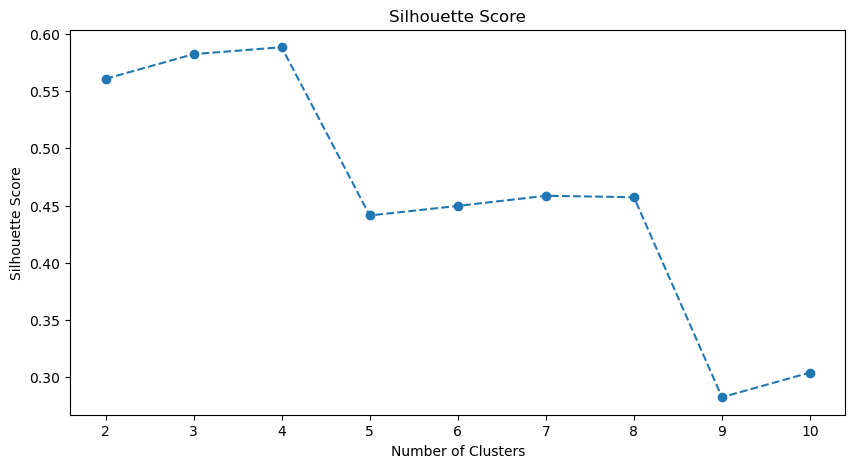

Optimal number of clusters: 4
Number of formulations in each cluster:
0      5
1     33
2    159
3     17
Name: cluster, dtype: int64


/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Unsupervised clustering test
# Clustering Test
def clustering_test(data):
    # Determine the optimal number of clusters using the elbow method
    inertias = []
    silhouette_scores = []
    for n_clusters in range(2, 11):  # Test different numbers of clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=999)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)  # Sum of squared distances to the closest centroid
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plotting the Elbow Method
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), inertias, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Plotting Silhouette Scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Choose the number of clusters based on the visualizations or other criteria
    # For example, using the silhouette score:
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because the range starts from 2
    return optimal_clusters

optimal_clusters = clustering_test(data)
print(f"Optimal number of clusters: {optimal_clusters}")

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Display the number of formulations in each cluster
formulations_per_cluster = data['cluster'].value_counts().sort_index()
print("Number of formulations in each cluster:")
print(formulations_per_cluster)

Here, we set the number of cluster as 4.

In [16]:
random_state = 999
kmeans = KMeans(n_clusters=4, random_state=random_state, n_init="auto").fit(data)

print(kmeans.labels_)

[2 3 1 2 2 2 2 0 2 1 2 2 1 2 2 1 2 1 1 2 1 2 0 1 0 2 2 2 3 1 3 1 0 2 2 2 2
 2 1 1 2 0 3 2 3 2 2 2 0 0 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 1 0 2 2 0 2 0 2 2
 2 2 2 1 2 1 1 2 1 2 0 2 1 0 1 2 2 2 2 2 2 2 1 2 2 0 1 3 2 0 2 1 2 2 2 1 2
 2 2 2 0 0 2 2 2 3 2 3 1 2 2 2 3 2 2 2 2 2 2 0 1 0 1 2 2 1 2 0 2 2 3 1 3 0
 2 2 1 2 2 2 2 2 3 2 2 0 2 2 2 2 0 0 1 1 2 3 1 0 2 1 2 2 0 2 3 3 2 0 1 1 2
 0 3 2 1 2 2 2 0 2 0 1 3 1 2 2 0 3 2 2 2 0 1 2 2 1 2 2 2 0]


In [17]:
data_pca = data.copy()
data_pca['cluster'] = kmeans.labels_
data_pca

,a,b,c,d,e,f,g,h,i,cluster
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,2
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,3
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,2
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,2
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,2


In [18]:
pca = PCA(2)
pca_res = pca.fit_transform(data)

data_pca['PC-1'] = pca_res[:, 0]
data_pca['PC-2'] = pca_res[:, 1]
data_pca.head()

,a,b,c,d,e,f,g,h,i,cluster,PC-1,PC-2
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,2,-0.971431,-0.318559
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,3,5.199305,-2.037795
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,0.203440,-1.565325
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,2,-0.909935,-0.527755
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,2,-1.503253,-0.396055


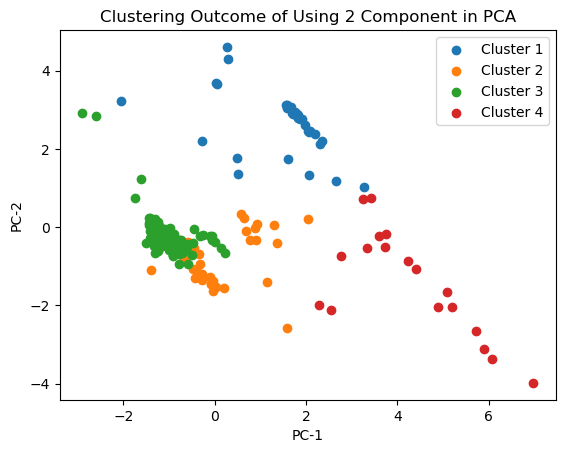

In [19]:
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]
cluster_3 = data_pca[data_pca['cluster'] == 3]

plt.scatter(cluster_0['PC-1'], cluster_0['PC-2'], label='Cluster 1')
plt.scatter(cluster_1['PC-1'], cluster_1['PC-2'], label='Cluster 2')
plt.scatter(cluster_2['PC-1'], cluster_2['PC-2'], label='Cluster 3')
plt.scatter(cluster_3['PC-1'], cluster_3['PC-2'], label='Cluster 4')

plt.title('Clustering Outcome of Using 2 Component in PCA')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.show()

Referring to the output of the clustering, Cluster 2 and Cluster 3 are very close to each other while Cluster 1 and Cluster 4 is positioned relative far from the other clusters.

In [20]:
print('PCA explained variance:')
print(pca.explained_variance_ratio_)

PCA explained variance:
[0.45432856 0.28433142]


Explained variance ratio is a measure of the proportion of the total variance in the original dataset that is explained by each principal component. 

From the results shown above, we can see that **45.4%** of total variance is being explained by the first principal component, and **28.4%** of total variance is being explained by the second principal component.

In [21]:
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=['a','b','c','d','e','f','g','h','i','cluster'],index = ['PC-1','PC-2']))


             a         b         c         d        e         f         g  \
PC-1  0.000955  0.009304 -0.712275  0.041268 -0.01024 -0.080983  0.690763   
PC-2 -0.001368  0.377301 -0.532096  0.244722  0.16307  0.104522 -0.553782   

             h         i   cluster  
PC-1  0.071710  0.001233  0.043739  
PC-2  0.215624 -0.015730 -0.351703  


The PCA sign does not affect the interpretation since the sign does not affect the variance contained in each component.

From the PCA component stated above, we can say that for the first component, **formula c** and **formula g** are the most important addictives.

Whereas for the second component, **formula c** and **formula g** are still the important addictives.

Hence, we can conclude that formula c and formula g has the best burning characteristics.

# Q2

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
from sklearn.neural_network import MLPRegressor

## Load dataset

In [23]:
# Load the dataset (assuming it's in CSV format)
data_ffb = pd.read_csv("palm_ffb.csv") 

# Display the first few rows of the dataset
data_ffb.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


## Check if there is any missing value. If yes, remove the instance.

In [24]:
# Check if there is any missing value. If yes, remove the instance.
data_ffb.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

There is no missing value in the dataset.

## Split Month and Year

In [25]:
# Split Date into Month and Year
data_ffb['Date'] = pd.to_datetime(data_ffb['Date'], format='%d.%m.%Y')
data_ffb.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [26]:
data_ffb['Year'] = data_ffb['Date'].dt.year
data_ffb['Month'] = data_ffb['Date'].dt.month
data_ffb.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year,Month
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,2008,1
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,2008,2
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,2008,3
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,2008,4
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,2008,5


The 'Date' column is seperated into 'Year' and 'Month' respectively to check on whether time/season is one of the factors affecting the fresh fruit bunch yield.

## Descriptive Statistics of the dataset

In [27]:
# Descriptive Statistics
print("Descriptive Statistics:")
data_ffb.describe()

Descriptive Statistics:


,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year,Month
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231,2012.923077,6.423077
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751,3.136718,3.434583
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000,2008.000000,1.000000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000,2010.000000,3.250000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000,2013.000000,6.000000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500,2016.000000,9.000000
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000,2018.000000,12.000000


Above shows a quick overview of the basic statistics of the dataset, we can conclude that the minimum and maximum range for all features are fairly small, except for **precipitation**. 

## Correlation Analysis

In [28]:
corr = data_ffb.corrwith(data_ffb['FFB_Yield']).sort_values(ascending=False)
print(corr)

FFB_Yield        1.000000
Month            0.671277
Precipitation    0.289604
Working_days     0.116364
Min_Temp         0.103830
Year             0.051947
SoilMoisture    -0.003183
Average_Temp    -0.005494
Max_Temp        -0.071201
HA_Harvested    -0.350222
dtype: float64


/var/folders/fy/znhd0rd14c37sv26wj63t8dc0000gn/T/ipykernel_34692/2078665603.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_ffb.corrwith(data_ffb['FFB_Yield']).sort_values(ascending=False)


When performiing correlation analysis using 'FFB_Yield' as our target label, the 'Month' features poses the highest correlation factor of 0.7.

## Visualization to access data distribution

### Correlation analysis

/var/folders/fy/znhd0rd14c37sv26wj63t8dc0000gn/T/ipykernel_34692/1257588890.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_ffb.corr()


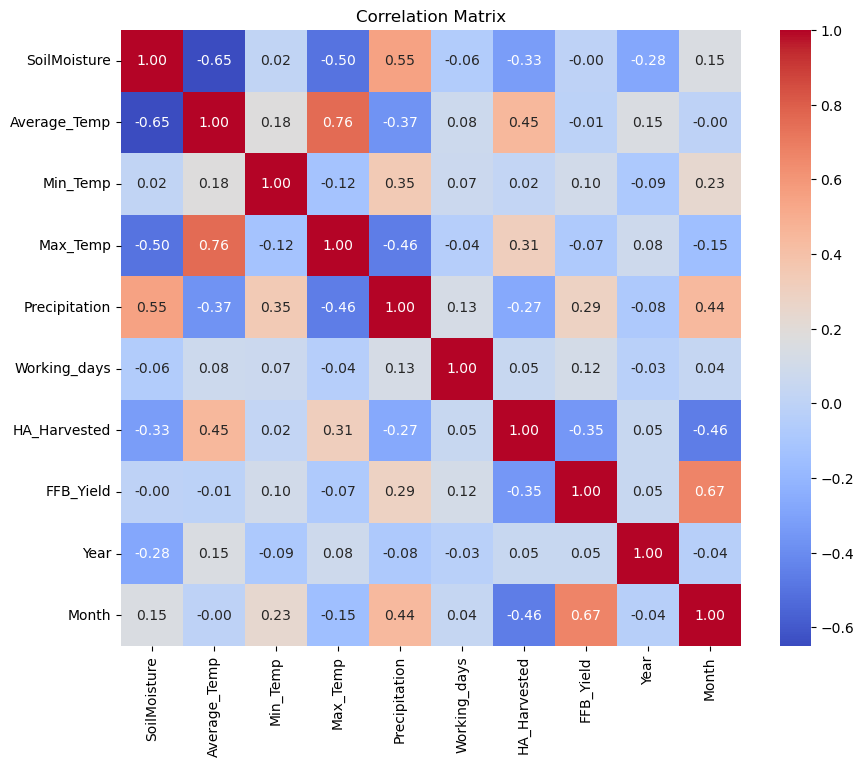

In [29]:
corr_matrix = data_ffb.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the heatmap above, the highest value of correlation coefficient is 0.67, between **FFB_Yield** and **Month**, indicating a fairly strong positive linear correlation between the two variables. 

We can see that **Precipitation** is positively correlated towards **FFB_Yield** too.


### Multivariate Analysis

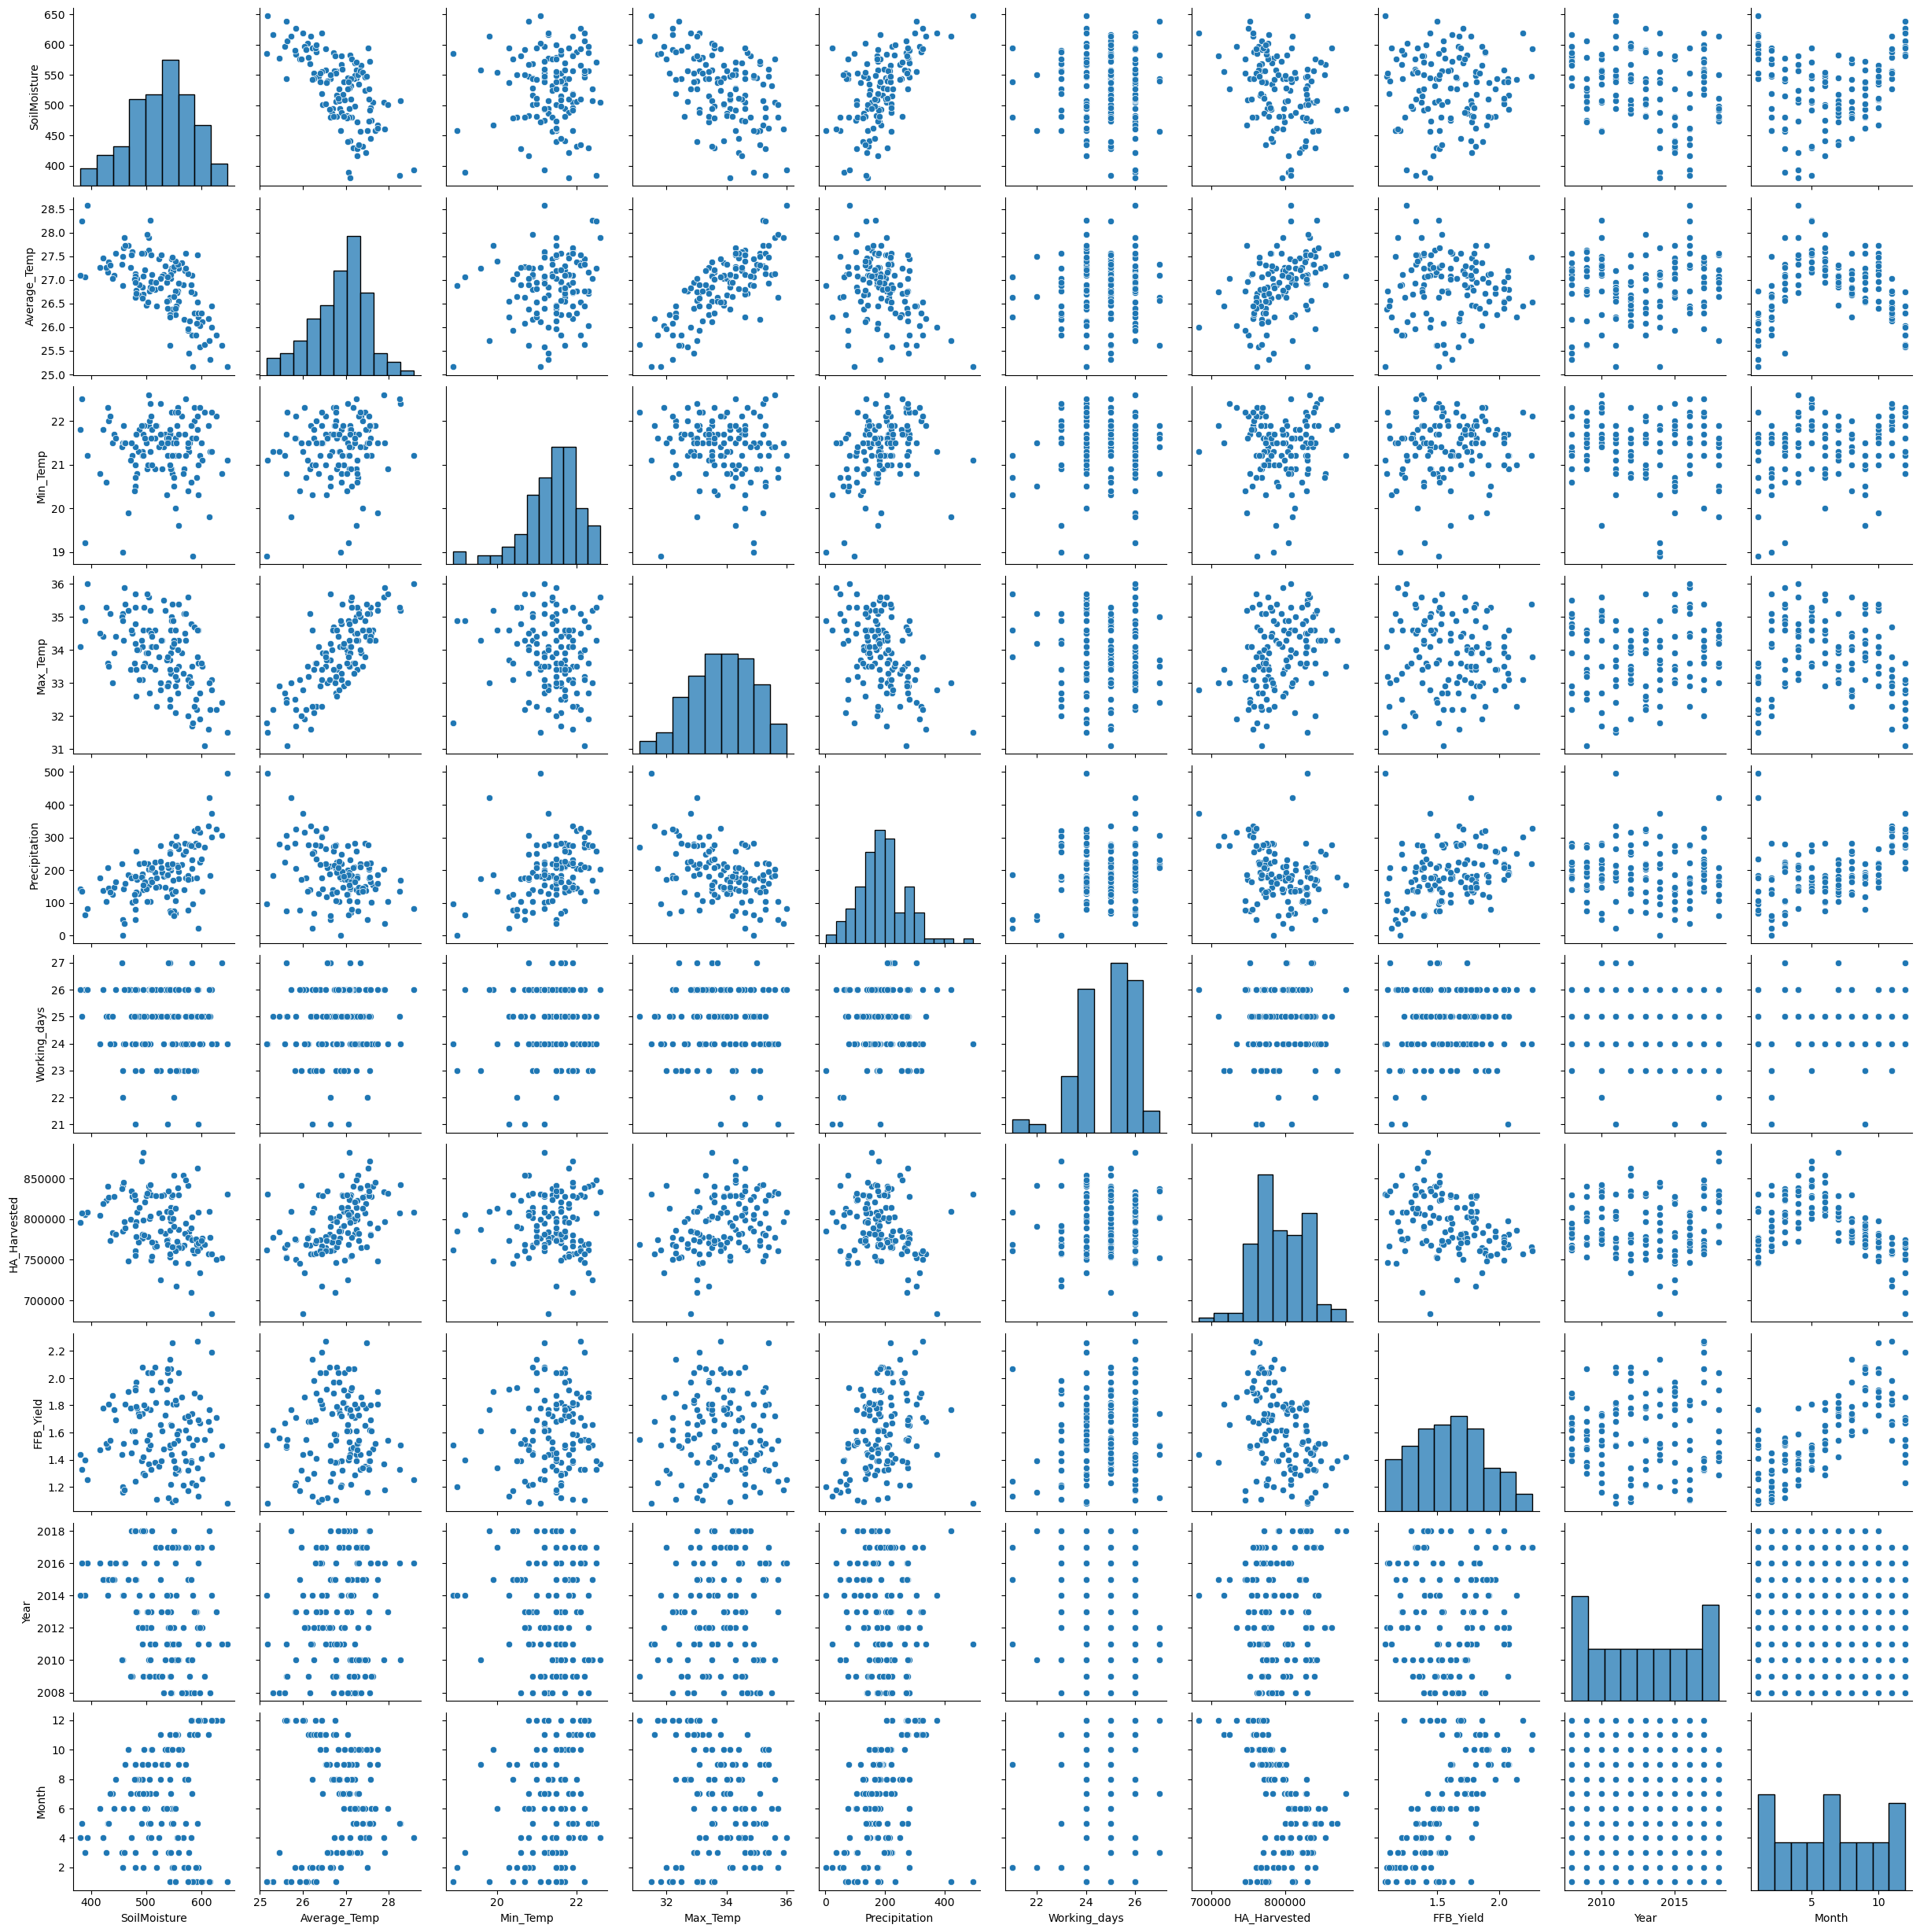

In [30]:
sns.pairplot(data_ffb)
plt.show()

## Regression Analysis

### Data Splitting

Data splitting is important to ensure model effectiveness, prevent over-fitting and evaluate performance on unseen data.

A 80-20 split is aimed to strike a balance between providing enough data for effective model training and reserving a separate portion for unbiased model evaluation.

In [31]:
# Columns that are treated as features
df_features = data_ffb[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days', 'HA_Harvested','Month','Year']]
df_features.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,Month,Year
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1,2008
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,2,2008
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,3,2008
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,4,2008
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,5,2008


In [32]:
# Labels (target variables)
df_targets = data_ffb[['FFB_Yield']]
df_targets.head()

,FFB_Yield
0,1.62
1,1.45
2,1.56
3,1.39
4,1.44


In [33]:
# Used for reproducible results
random_state = 999

X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=random_state)

*X_train* consists of **80% data** randomly picked from original data, where it is used to train machine learning models by learning patterns and relationships in the data to make predictions or classifications.

*X_test* consists of **20% data** randomly picked from original data, where it is used to evaluate the performance of the trained model and serves as a benchmark to measure how well the model generalizes to new, unseen data.

*y_train* consists of the labels of each data present in *X_train*

*y_test* consists of the labels of each data present in *X_test*

### Data Transformation
Data transformation involves modifying the original data to make it more suitable for further exploration, modeling or visualization. 

Data transformation is conducted on the training set and testing set separately. In this case, standard is performed by scaling all the continuous numerical variable into a common scale (normal distribution) to help in comparing variables with different units and ranges. Standard scaling allows the data to be more machine readable thus speeding up machine learning.

In [34]:
# scale all training and testing data with StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [35]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns, index=X_train.index)
scaled_X_train.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,Month,Year
80,0.038960,-0.409797,-1.683061,-0.090139,-0.942549,0.212829,-0.509025,0.692101,0.336803
114,-0.313214,0.210255,0.760755,0.292491,-0.590154,1.064145,1.011587,0.111629,1.292098
83,1.584406,-1.279503,-0.155676,-0.951057,2.208065,1.064145,-3.024951,1.562808,0.336803
128,-1.006323,0.222840,-0.613891,0.388149,-0.186008,-1.489803,-0.000623,0.692101,1.610529
19,-0.538006,-0.055044,0.913494,-1.046715,0.118334,-0.638487,0.228933,0.401865,-1.255356


### Model Training

In [36]:
regression_label = y_test['FFB_Yield']

#### Linear regression

In [37]:
# regression model
regr = LinearRegression()

# fitting model
regr.fit(scaled_X_train, y_train['FFB_Yield'])

# prediction model
regr_y_pred = regr.predict(scaled_X_test)

# calculating Mean Absolute Error (MAE)
regr_mae = mean_absolute_error(y_true=regression_label,y_pred=regr_y_pred)

# calculating Mean Square Error (MSE)
regr_mse = mean_squared_error(y_true=regression_label,y_pred=regr_y_pred)

# calculating Root Mean Squared Error (RMSE)
regr_rmse = mean_squared_error(y_true=regression_label,y_pred=regr_y_pred,squared=False)

# calculated R-squared score
regr_r2score = regr.score(scaled_X_test, regression_label)

print("Linear Regression")
print("R2:", regr_r2score)
print("MAE:", regr_mae)
print("MSE:", regr_mse)
print("RMSE:", regr_rmse)

Linear Regression
R2: 0.06850686079903401
MAE: 0.2116195725404147
MSE: 0.06533032643579698
RMSE: 0.2555979781527956


/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The model is fitted with scaled training data and predicted with scaled testing data. The R2 score, MAE, MSE and RMSE are calculated and shown.

In [38]:
# Feature importance
lr_fi = pd.DataFrame({'Feature': df_features.columns, 'Coefficient': regr.coef_})
lr_fi= lr_fi.sort_values(by='Coefficient', ascending=False)
print("Feature Importance of Linear Regression:")
lr_fi


Feature Importance of Linear Regression:


,Feature,Coefficient
7,Month,0.206923
3,Max_Temp,0.031201
5,Working_days,0.030290
4,Precipitation,0.022300
8,Year,0.011646
6,HA_Harvested,-0.005697
2,Min_Temp,-0.018364
1,Average_Temp,-0.071167
0,SoilMoisture,-0.090858


When Linear Regression is used, Month is the most affecting factors in influencing the fresh fruit bunch yield.

#### Random Forest

In [39]:
# random forest regression model
rf_regr = RandomForestRegressor(random_state=random_state)

rf_regr.fit(scaled_X_train, y_train["FFB_Yield"])

rf_regr_y_pred = rf_regr.predict(scaled_X_test)

rf_regr_mae = mean_absolute_error(y_true=regression_label,y_pred=rf_regr_y_pred)
rf_regr_mse = mean_squared_error(y_true=regression_label,y_pred=rf_regr_y_pred)
rf_regr_rmse = mean_squared_error(y_true=regression_label,y_pred=rf_regr_y_pred,squared=False)
rf_regr_r2score = rf_regr.score(scaled_X_test, regression_label)

print("Random Forest")
print("R2:", rf_regr_r2score)
print("MAE:", rf_regr_mae)
print("MSE:", rf_regr_mse)
print("RMSE:", rf_regr_rmse)

Random Forest
R2: 0.46735239700240216
MAE: 0.15423461538461547
MSE: 0.03735727115384617
RMSE: 0.19328029168501937


/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


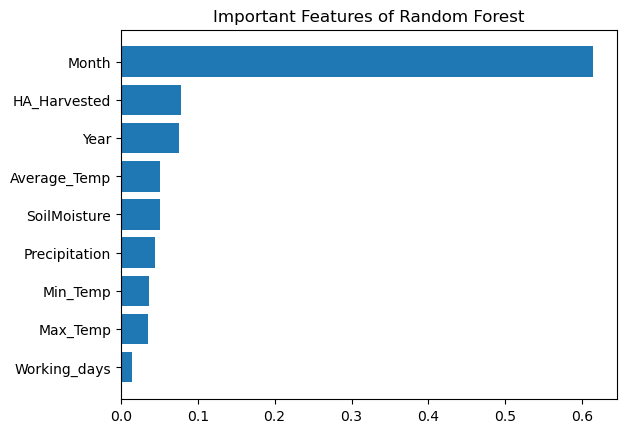

,Feature,score
8,Month,0.614679
7,HA_Harvested,0.078366
6,Year,0.075325
5,Average_Temp,0.051114
4,SoilMoisture,0.050778
3,Precipitation,0.043978
2,Min_Temp,0.036339
1,Max_Temp,0.035017
0,Working_days,0.014404


In [40]:
rf_fi = list(zip(df_features,rf_regr.feature_importances_))
rf_fi.sort(key = lambda x : x[1])
plt.barh([x[0] for x in rf_fi],[x[1] for x in rf_fi])
plt.title('Important Features of Random Forest')

plt.show()

rf_fi = pd.DataFrame(rf_fi, columns=['Feature', 'score']).sort_values(by='score', ascending=False)
rf_fi

When Random Forest is used, Month is still the most affecting factors in influencing the fresh fruit bunch yield.

### Select Top 5 Features

In [41]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k=5)
# learn relationship from training data
fs.fit(scaled_X_train, y_train['FFB_Yield'])
# transform train input data
X_train_fs = fs.transform(scaled_X_train)
# transform test input data
X_test_fs = fs.transform(scaled_X_test)


/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


#### Linear regression

In [42]:
# regression model
regr_fs = LinearRegression()

# # fitting model
regr_fs.fit(X_train_fs, y_train['FFB_Yield'])

# prediction model
regr_fs_y_pred = regr_fs.predict(X_test_fs)

# calculating Mean Absolute Error (MAE)
regr_fs_mae = mean_absolute_error(y_true=regression_label,y_pred=regr_fs_y_pred)

# calculating Mean Square Error (MSE)
regr_fs_mse = mean_squared_error(y_true=regression_label,y_pred=regr_fs_y_pred)

# calculating Root Mean Squared Error (RMSE)
regr_fs_rmse = mean_squared_error(y_true=regression_label,y_pred=regr_fs_y_pred,squared=False)

# calculated R-squared score
regr_fs_r2score = regr_fs.score(X_test_fs, regression_label)

print("Linear Regression after select top 5 features")
print("R2:", regr_fs_r2score)
print("MAE:", regr_fs_mae)
print("MSE:", regr_fs_mse)
print("RMSE:", regr_fs_rmse)

Linear Regression after select top 5 features
R2: 0.1337000177368164
MAE: 0.19852025191119718
MSE: 0.06075800051638237
RMSE: 0.24649138020706193


In [43]:
mask1 = fs.get_support()
lr_fs_fi_name = [] # The list of your K best features

# get features name
for bool_val, feature in zip(mask1, df_features):
    if bool_val:
        lr_fs_fi_name.append(feature)

lr_fs_scores = fs.scores_[fs.get_support()]
lr_fs_names_scores = list(zip(lr_fs_fi_name, lr_fs_scores))
lr_fs_fi_df = pd.DataFrame(data = lr_fs_names_scores, columns=['Feature', 'F_Scores'])
lr_fs_fi_df = lr_fs_fi_df.sort_values(by='F_Scores', ascending=False)
print("Feature Importance of Linear Regression after select Top 5:")
lr_fs_fi_df

Feature Importance of Linear Regression after select Top 5:


,Feature,F_Scores
4,Month,104.388357
3,HA_Harvested,15.101016
1,Precipitation,6.255811
2,Working_days,2.076174
0,SoilMoisture,0.755631


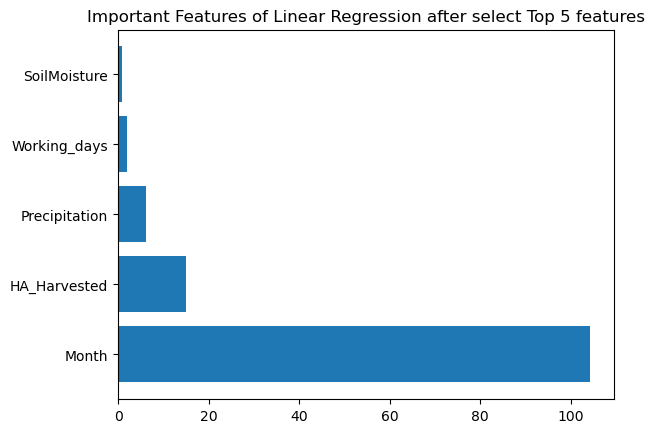

In [44]:
plt.barh(lr_fs_fi_df['Feature'],lr_fs_fi_df['F_Scores'])
plt.title('Important Features of Linear Regression after select Top 5 features')

plt.show()

#### Random Forest

In [45]:
# random forest regression model
rf_regr_fs = RandomForestRegressor(random_state=random_state)

rf_regr_fs.fit(X_train_fs, y_train["FFB_Yield"])

rf_regr_fs_y_pred = rf_regr_fs.predict(X_test_fs)

rf_regr_fs_mae = mean_absolute_error(y_true=regression_label,y_pred=rf_regr_fs_y_pred)
rf_regr_fs_mse = mean_squared_error(y_true=regression_label,y_pred=rf_regr_fs_y_pred)
rf_regr_fs_rmse = mean_squared_error(y_true=regression_label,y_pred=rf_regr_fs_y_pred,squared=False)
rf_regr_fs_r2score = rf_regr_fs.score(X_test_fs, regression_label)

print("Random Forest")
print("R2:", rf_regr_fs_r2score)
print("MAE:", rf_regr_fs_mae)
print("MSE:", rf_regr_fs_mse)
print("RMSE:", rf_regr_fs_rmse)

Random Forest
R2: 0.4373485232423483
MAE: 0.15980000000000014
MSE: 0.03946159461538469
RMSE: 0.19864942641594688


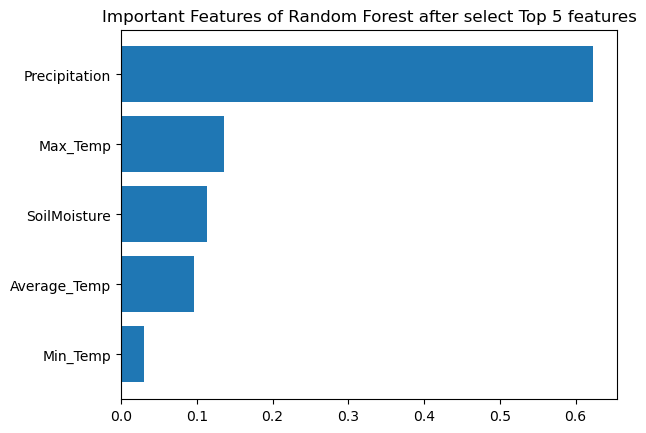

,Feature,score
4,Precipitation,0.623478
3,Max_Temp,0.136402
2,SoilMoisture,0.113337
1,Average_Temp,0.096542
0,Min_Temp,0.030241


In [46]:
rf_fs_fi = list(zip(df_features,rf_regr_fs.feature_importances_))
rf_fs_fi.sort(key = lambda x : x[1])
plt.barh([x[0] for x in rf_fs_fi],[x[1] for x in rf_fs_fi])
plt.title('Important Features of Random Forest after select Top 5 features')

plt.show()

rf_fs_fi = pd.DataFrame(rf_fs_fi, columns=['Feature', 'score']).sort_values(by='score', ascending=False)
rf_fs_fi

### Select Top 4 Features

In [47]:
# configure to select all features
fs_top4 = SelectKBest(score_func=f_regression, k=4)
# learn relationship from training data
fs_top4.fit(scaled_X_train, y_train['FFB_Yield'])
# transform train input data
X_train_fs_top4 = fs_top4.transform(scaled_X_train)
# transform test input data
X_test_fs_top4 = fs_top4.transform(scaled_X_test)

/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


#### Linear Regression

In [48]:
# regression model
regr_fs_top4 = LinearRegression()

# # fitting model
regr_fs_top4.fit(X_train_fs_top4, y_train['FFB_Yield'])

# prediction model
regr_fs_top4_y_pred = regr_fs_top4.predict(X_test_fs_top4)

# calculating Mean Absolute Error (MAE)
regr_fs_top4_mae = mean_absolute_error(y_true=regression_label,y_pred=regr_fs_top4_y_pred)

# calculating Mean Square Error (MSE)
regr_fs_top4_mse = mean_squared_error(y_true=regression_label,y_pred=regr_fs_top4_y_pred)

# calculating Root Mean Squared Error (RMSE)
regr_fs_top4_rmse = mean_squared_error(y_true=regression_label,y_pred=regr_fs_top4_y_pred,squared=False)

# calculated R-squared score
regr_fs_top4_r2score = regr_fs_top4.score(X_test_fs_top4, regression_label)

print("Linear Regression after select top 4 features")
print("R2:", regr_fs_top4_r2score)
print("MAE:", regr_fs_top4_mae)
print("MSE:", regr_fs_top4_mse)
print("RMSE:", regr_fs_top4_rmse)

Linear Regression after select top 4 features
R2: 0.16512789164620179
MAE: 0.18483981451892417
MSE: 0.05855380472011011
RMSE: 0.24197893445527466


In [49]:
mask2 = fs_top4.get_support()
lr_fs_top4_fi_name = [] # The list of your K best features

# get features name
for bool_val, feature in zip(mask2, df_features):
    if bool_val:
        lr_fs_top4_fi_name.append(feature)

lr_fs_top4_scores = fs_top4.scores_[fs_top4.get_support()]
lr_fs_top4_names_scores = list(zip(lr_fs_top4_fi_name, lr_fs_top4_scores))
lr_fs_top4_fi_df = pd.DataFrame(data = lr_fs_top4_names_scores, columns=['Feature', 'F_Scores'])
lr_fs_top4_fi_df = lr_fs_top4_fi_df.sort_values(by='F_Scores', ascending=False)
print("Feature Importance of Linear Regression after select Top 4:")
lr_fs_top4_fi_df

Feature Importance of Linear Regression after select Top 4:


,Feature,F_Scores
3,Month,104.388357
2,HA_Harvested,15.101016
0,Precipitation,6.255811
1,Working_days,2.076174


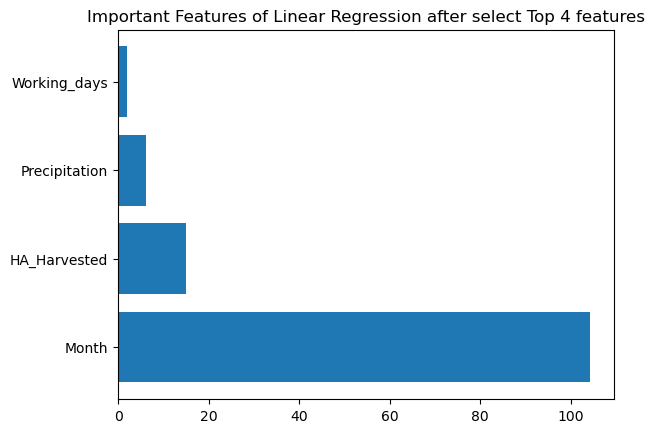

In [50]:
plt.barh(lr_fs_top4_fi_df['Feature'],lr_fs_top4_fi_df['F_Scores'])
plt.title('Important Features of Linear Regression after select Top 4 features')

plt.show()

#### Random Forest

In [51]:
# random forest regression model
rf_regr_fs_top4 = RandomForestRegressor(random_state=random_state)

rf_regr_fs_top4.fit(X_train_fs_top4, y_train["FFB_Yield"])

rf_regr_fs_top4_y_pred = rf_regr_fs_top4.predict(X_test_fs_top4)

rf_regr_fs_top4_mae = mean_absolute_error(y_true=regression_label,y_pred=rf_regr_fs_top4_y_pred)
rf_regr_fs_top4_mse = mean_squared_error(y_true=regression_label,y_pred=rf_regr_fs_top4_y_pred)
rf_regr_fs_top4_rmse = mean_squared_error(y_true=regression_label,y_pred=rf_regr_fs_top4_y_pred,squared=False)
rf_regr_fs_top4_r2score = rf_regr_fs_top4.score(X_test_fs_top4, regression_label)

print("Random Forest")
print("R2:", rf_regr_fs_top4_r2score)
print("MAE:", rf_regr_fs_top4_mae)
print("MSE:", rf_regr_fs_top4_mse)
print("RMSE:", rf_regr_fs_top4_rmse)

Random Forest
R2: 0.3963156652527988
MAE: 0.1622730769230768
MSE: 0.04233943653846151
RMSE: 0.2057654891823736


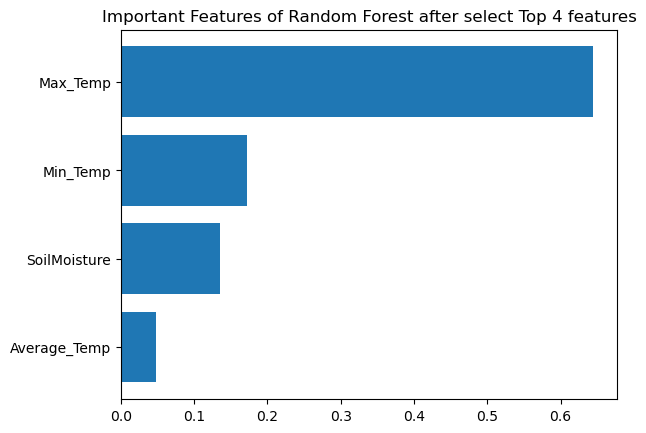

,Feature,score
3,Max_Temp,0.644813
2,Min_Temp,0.171582
1,SoilMoisture,0.135516
0,Average_Temp,0.048088


In [52]:
rf_fs_top4_fi = list(zip(df_features,rf_regr_fs_top4.feature_importances_))
rf_fs_top4_fi.sort(key = lambda x : x[1])
plt.barh([x[0] for x in rf_fs_top4_fi],[x[1] for x in rf_fs_top4_fi])
plt.title('Important Features of Random Forest after select Top 4 features')

plt.show()

rf_fs_top4_fi = pd.DataFrame(rf_fs_top4_fi, columns=['Feature', 'score']).sort_values(by='score', ascending=False)
rf_fs_top4_fi

### Select Top 3 Features

In [53]:
# configure to select all features
fs_top3 = SelectKBest(score_func=f_regression, k=3)
# learn relationship from training data
fs_top3.fit(scaled_X_train, y_train['FFB_Yield'])
# transform train input data
X_train_fs_top3 = fs_top3.transform(scaled_X_train)
# transform test input data
X_test_fs_top3 = fs_top3.transform(scaled_X_test)

/Users/minqileong/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


#### Linear Regression

In [54]:
# regression model
regr_fs_top3 = LinearRegression()

# # fitting model
regr_fs_top3.fit(X_train_fs_top3, y_train['FFB_Yield'])

# prediction model
regr_fs_top3_y_pred = regr_fs_top3.predict(X_test_fs_top3)

# calculating Mean Absolute Error (MAE)
regr_fs_top3_mae = mean_absolute_error(y_true=regression_label,y_pred=regr_fs_top3_y_pred)

# calculating Mean Square Error (MSE)
regr_fs_top3_mse = mean_squared_error(y_true=regression_label,y_pred=regr_fs_top3_y_pred)

# calculating Root Mean Squared Error (RMSE)
regr_fs_top3_rmse = mean_squared_error(y_true=regression_label,y_pred=regr_fs_top3_y_pred,squared=False)

# calculated R-squared score
regr_fs_top3_r2score = regr_fs_top3.score(X_test_fs_top3, regression_label)

print("Linear Regression after select top 3 features")
print("R2:", regr_fs_top3_r2score)
print("MAE:", regr_fs_top3_mae)
print("MSE:", regr_fs_top3_mse)
print("RMSE:", regr_fs_top3_rmse)

Linear Regression after select top 3 features
R2: 0.1476778705769637
MAE: 0.1881719825542506
MSE: 0.05977766298034675
RMSE: 0.24449470951402352


In [55]:
mask3 = fs_top3.get_support()
lr_fs_top3_fi_name = [] # The list of your K best features

# get features name
for bool_val, feature in zip(mask3, df_features):
    if bool_val:
        lr_fs_top3_fi_name.append(feature)

lr_fs_top3_scores = fs_top3.scores_[fs_top3.get_support()]
lr_fs_top3_names_scores = list(zip(lr_fs_top3_fi_name, lr_fs_top3_scores))
lr_fs_top3_fi_df = pd.DataFrame(data = lr_fs_top3_names_scores, columns=['Feature', 'F_Scores'])
lr_fs_top3_fi_df = lr_fs_top3_fi_df.sort_values(by='F_Scores', ascending=False)
print("Feature Importance of Linear Regression after select Top 3:")
lr_fs_top3_fi_df

Feature Importance of Linear Regression after select Top 3:


,Feature,F_Scores
2,Month,104.388357
1,HA_Harvested,15.101016
0,Precipitation,6.255811


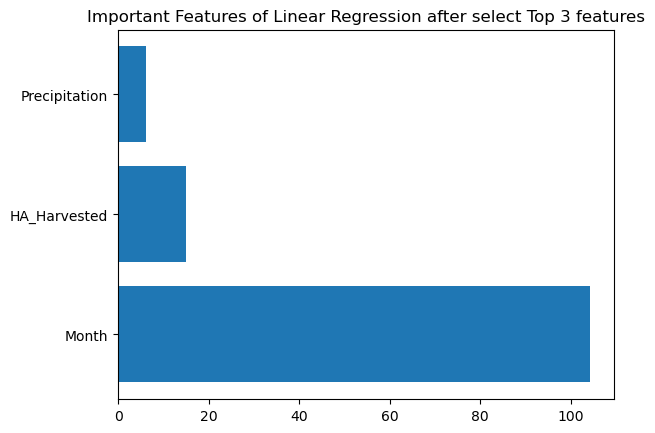

In [56]:
plt.barh(lr_fs_top3_fi_df['Feature'],lr_fs_top3_fi_df['F_Scores'])
plt.title('Important Features of Linear Regression after select Top 3 features')

plt.show()

#### Random Forest

In [57]:
# random forest regression model
rf_regr_fs_top3 = RandomForestRegressor(random_state=random_state)

rf_regr_fs_top3.fit(X_train_fs_top3, y_train["FFB_Yield"])

rf_regr_fs_top3_y_pred = rf_regr_fs_top3.predict(X_test_fs_top3)

rf_regr_fs_top3_mae = mean_absolute_error(y_true=regression_label,y_pred=rf_regr_fs_top3_y_pred)
rf_regr_fs_top3_mse = mean_squared_error(y_true=regression_label,y_pred=rf_regr_fs_top3_y_pred)
rf_regr_fs_top3_rmse = mean_squared_error(y_true=regression_label,y_pred=rf_regr_fs_top3_y_pred,squared=False)
rf_regr_fs_top3_r2score = rf_regr_fs_top3.score(X_test_fs_top3, regression_label)

print("Random Forest")
print("R2:", rf_regr_fs_top3_r2score)
print("MAE:", rf_regr_fs_top3_mae)
print("MSE:", rf_regr_fs_top3_mse)
print("RMSE:", rf_regr_fs_top3_rmse)

Random Forest
R2: 0.3607809188948625
MAE: 0.1651115384615385
MSE: 0.044831668076923084
RMSE: 0.21173490046972201


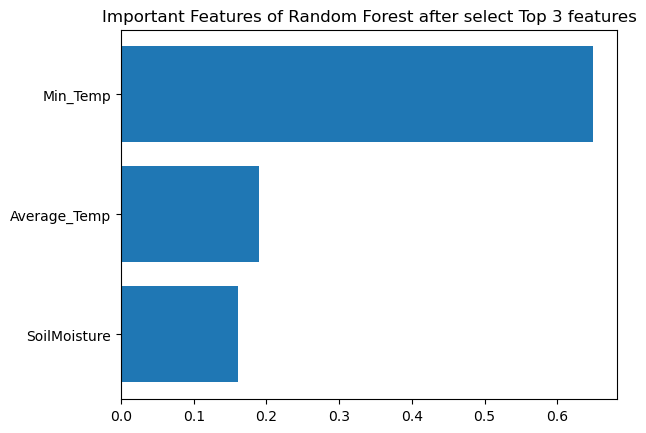

,Feature,score
2,Min_Temp,0.649482
1,Average_Temp,0.190238
0,SoilMoisture,0.160280


In [58]:
rf_fs_top3_fi = list(zip(df_features,rf_regr_fs_top3.feature_importances_))
rf_fs_top3_fi.sort(key = lambda x : x[1])
plt.barh([x[0] for x in rf_fs_top3_fi],[x[1] for x in rf_fs_top3_fi])
plt.title('Important Features of Random Forest after select Top 3 features')

plt.show()

rf_fs_top3_fi = pd.DataFrame(rf_fs_top3_fi, columns=['Feature', 'score']).sort_values(by='score', ascending=False)
rf_fs_top3_fi

## Conclusion

In [59]:
df_final = {'Data': ['LR', 'LR Top 5', 'LR Top 4', 'LR Top 3', 'RF', 'RF Top 5', 'RF Top 4', 'RF Top 3'],
            'R2': [regr_r2score, regr_fs_r2score, regr_fs_top4_r2score, regr_fs_top3_r2score, rf_regr_r2score, rf_regr_fs_r2score, rf_regr_fs_top4_r2score, rf_regr_fs_top3_r2score],
            'MAE': [regr_mae, regr_fs_mae, regr_fs_top4_mae, regr_fs_top3_mae, rf_regr_mae, rf_regr_fs_mae, rf_regr_fs_top4_mae, rf_regr_fs_top3_mae],
            'MSE': [regr_mse, regr_fs_mse, regr_fs_top4_mse, regr_fs_top3_mse, rf_regr_mse, rf_regr_fs_mse, rf_regr_fs_top4_mse, rf_regr_fs_top3_mse],
            'RMSE': [regr_rmse, regr_fs_rmse, regr_fs_top4_rmse, regr_fs_top3_rmse, rf_regr_rmse, rf_regr_fs_rmse, rf_regr_fs_top4_rmse, rf_regr_fs_top3_rmse]}

df_final = pd.DataFrame(df_final).sort_values(by=['R2'], ascending=True)
df_final

,Data,R2,MAE,MSE,RMSE
0,LR,0.068507,0.211620,0.065330,0.255598
1,LR Top 5,0.133700,0.198520,0.060758,0.246491
3,LR Top 3,0.147678,0.188172,0.059778,0.244495
2,LR Top 4,0.165128,0.184840,0.058554,0.241979
7,RF Top 3,0.360781,0.165112,0.044832,0.211735
6,RF Top 4,0.396316,0.162273,0.042339,0.205765
5,RF Top 5,0.437349,0.159800,0.039462,0.198649
4,RF,0.467352,0.154235,0.037357,0.193280


In [60]:
df_final_feature = {'LR': [lr_fi.iloc[0,0],lr_fi.iloc[1,0],lr_fi.iloc[2,0]],
                    'LR Top 5': [lr_fs_fi_df.iloc[0,0],lr_fs_fi_df.iloc[1,0],lr_fs_fi_df.iloc[2,0],], 
                    'LR Top 4': [lr_fs_top4_fi_df.iloc[0,0],lr_fs_top4_fi_df.iloc[1,0],lr_fs_top4_fi_df.iloc[2,0]], 
                    'LR Top 3': [lr_fs_top3_fi_df.iloc[0,0],lr_fs_top3_fi_df.iloc[1,0],lr_fs_top3_fi_df.iloc[2,0]], 
                    'RF': [rf_fi.iloc[0,0],rf_fi.iloc[1,0],rf_fi.iloc[2,0]],
                    'RF Top 5': [rf_fs_fi.iloc[0,0],rf_fs_fi.iloc[1,0],rf_fs_fi.iloc[2,0]], 
                    'RF Top 4': [rf_fs_top4_fi.iloc[0,0],rf_fs_top4_fi.iloc[1,0],rf_fs_top4_fi.iloc[2,0]], 
                    'RF Top 3': [rf_fs_top3_fi.iloc[0,0],rf_fs_top3_fi.iloc[1,0],rf_fs_top3_fi.iloc[2,0]]}

df_final_feature = pd.DataFrame(df_final_feature)
df_final_feature

,LR,LR Top 5,LR Top 4,LR Top 3,RF,RF Top 5,RF Top 4,RF Top 3
0,Month,Month,Month,Month,Month,Precipitation,Max_Temp,Min_Temp
1,Max_Temp,HA_Harvested,HA_Harvested,HA_Harvested,HA_Harvested,Max_Temp,Min_Temp,Average_Temp
2,Working_days,Precipitation,Precipitation,Precipitation,Year,SoilMoisture,SoilMoisture,SoilMoisture


As a conclusion, linear regression has the lowest R2 and the highest RMSE, indicate that the predicted and observed are not highly correlated. 

Following the results of random forest regression, the 'Month' is the most importing factor affecting the fresh fruit bunch field, followed by precipitation, maximum temperature and minimum temperature that is associated with month too.

## Plot actual vs. predicted values

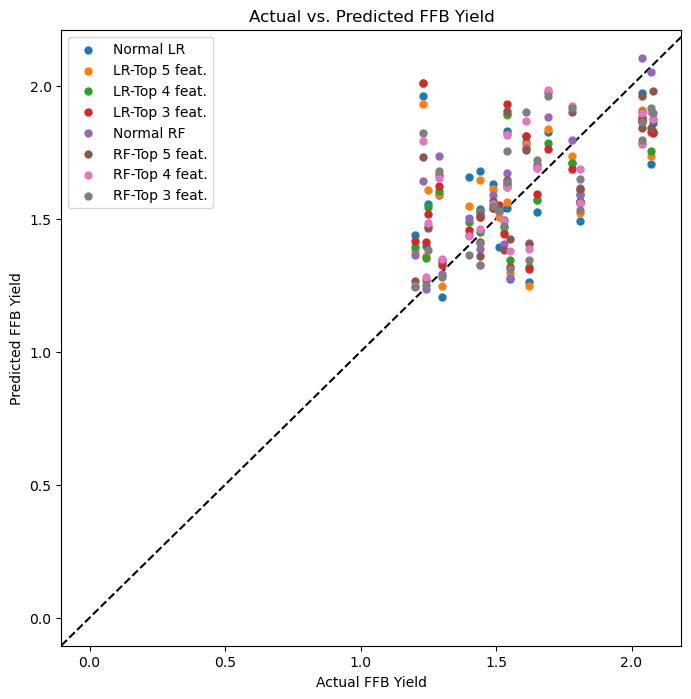

In [61]:
# Plot actual vs. predicted values
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test, regr_y_pred, s=25, zorder=10, label='Normal LR')
ax.scatter(y_test, regr_fs_y_pred , s=25, zorder=10, label='LR-Top 5 feat.')
ax.scatter(y_test, regr_fs_top4_y_pred, s=25, zorder=10, label='LR-Top 4 feat.')
ax.scatter(y_test, regr_fs_top3_y_pred, s=25, zorder=10, label='LR-Top 3 feat.')
ax.scatter(y_test, rf_regr_y_pred, s=25, zorder=10, label='Normal RF')
ax.scatter(y_test, rf_regr_fs_y_pred, s=25, zorder=10, label='RF-Top 5 feat.')
ax.scatter(y_test, rf_regr_fs_top4_y_pred, s=25, zorder=10, label='RF-Top 4 feat.')
ax.scatter(y_test, rf_regr_fs_top3_y_pred, s=25, zorder=10, label='RF-Top 3 feat.')
ax.axline((0, 0), slope=1, linestyle='--', c='k')

plt.legend()
plt.xlabel('Actual FFB Yield')
plt.ylabel('Predicted FFB Yield')
plt.title('Actual vs. Predicted FFB Yield')
plt.show()

Based on the plotted graph, random forest is closest to the x=y line, indicated that the predicted FFB yield and actual FFB yield are closely related to each other.

# Q3

In [62]:
from collections import Counter
import re

## Load text

In [63]:
# Text data
text = """
As a term, data analytics predominantly refers to an assortment of applications, from basic business
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate
category. Data analytics initiatives can help businesses increase revenues, improve operational
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of
boosting business performance. Depending on the particular application, the data that's analyzed
can consist of either historical records or new information that has been processed for real-time
analytics uses. In addition, it can come from a mix of internal systems and external data sources. At
a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find
patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical
techniques to determine whether hypotheses about a data set are true or false. EDA is often
compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a
distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data
analytics can also be separated into quantitative data analysis and qualitative data analysis. The
former involves analysis of numerical data with quantifiable variables that can be compared or
measured statistically. The qualitative approach is more interpretive -- it focuses on understanding
the content of non-numerical data like text, images, audio and video, including common phrases,
themes and points of view.
"""


## a. Probability of the word "data" occurring in each line

In [64]:
# a. Probability of the word "data" occurring in each line
def word_occurrence_probability(text, word):
    lines = text.strip().split('\n')
    probabilities = []
    for line in lines:
        words_in_line = re.findall(r'\b\w+\b', line.lower())  # Tokenize words
        word_count = len(words_in_line)
        data_count = words_in_line.count(word.lower())
        probability = data_count / word_count if word_count > 0 else 0
        probabilities.append(probability)
    return probabilities

word = "data"
probabilities = word_occurrence_probability(text, word)
print(f"Probability of '{word}' occurring in each line:")
for i, prob in enumerate(probabilities, start=1):
    print(f"Line {i}: {prob:.2f}")

Probability of 'data' occurring in each line:
Line 1: 0.07
Line 2: 0.00
Line 3: 0.00
Line 4: 0.06
Line 5: 0.06
Line 6: 0.07
Line 7: 0.09
Line 8: 0.00
Line 9: 0.00
Line 10: 0.08
Line 11: 0.00
Line 12: 0.06
Line 13: 0.13
Line 14: 0.15
Line 15: 0.06
Line 16: 0.00
Line 17: 0.12
Line 18: 0.14
Line 19: 0.07
Line 20: 0.00
Line 21: 0.07
Line 22: 0.00


## b. Distribution of distinct word counts across all the lines

In [65]:
# b. Distribution of distinct word counts across all the lines
def word_counts(text):
    lines = text.strip().split('\n')
    counts = [len(set(re.findall(r'\b\w+\b', line.lower()))) for line in lines]
    return counts

word_counts = word_counts(text)
print("Distribution of distinct word counts across all the lines:")
counter = Counter(word_counts)
for count, frequency in counter.items():
    print(f"{count} distinct words: {frequency} lines")

Distribution of distinct word counts across all the lines:
15 distinct words: 3 lines
13 distinct words: 1 lines
14 distinct words: 5 lines
17 distinct words: 2 lines
11 distinct words: 2 lines
12 distinct words: 4 lines
16 distinct words: 3 lines
18 distinct words: 1 lines
5 distinct words: 1 lines


## c. Probability of the word "analytics" occurring after the word "data"

In [66]:
# c. Probability of the word "analytics" occurring after the word "data"
def prob(text, word1, word2):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize words
    data_index = [i for i, w in enumerate(words) if w == word1.lower()]
    analytics = sum(1 for i in data_index if i < len(words) - 1 and words[i + 1] == word2.lower())
    data_count = len(data_index)
    probability = analytics / data_count if data_count > 0 else 0
    return probability

word1 = "data"
word2 = "analytics"
probability = prob(text, word1, word2)
print(f"Probability of '{word2}' occurring after '{word1}': {probability:.2f}")

Probability of 'analytics' occurring after 'data': 0.33
